# Aplicación de PCA
## By: Luis Alberto Chavarría Zamora

### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

Se usa un dataset en el cual se intenta describir un auto como malo, bueno, muy bueno, etc a partir de una serie de características o features, se va a utilizar PCA para reducir la dimensionalidad del problema. Este problema es interesante pues se puede ver como trabajar con información categórica y como se logra realizar el análisis de esta información.

Después de la transformación a valores cuantitativos hay  21  atributos


Text(0.5,1,'Ratio of PCA components')

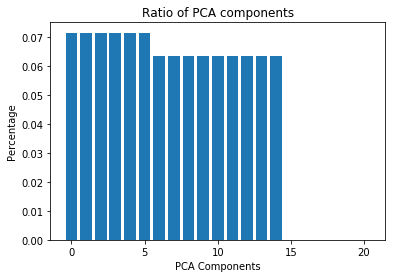

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
# Se importa el dataset por medio de pandas para manejo de estructura de datos
df = pd.read_csv(url, names=['buying','maint','doors','persons','lug_boot','safety','target'])

from sklearn.preprocessing import StandardScaler
features = ['buying','maint','doors','persons','lug_boot','safety']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

#Etiqueta los atributos entre 0 y los n-1, donde n es el número de variantes
dist_label = LabelEncoder()

#Transforma la matriz de entrada x en valores cuantitativos, usando el etiquetador de la línea anterior
for i in range(0,x.shape[1]):
	x[:,i] = dist_label.fit_transform(x[:,i])

#El OneHotEncoder convierte información categórica a estimadores
ohe = OneHotEncoder(categorical_features='all')
ohe.fit_transform(x)
x=ohe.transform(x).toarray()
#Estandariza la información
x = StandardScaler().fit_transform(x)

#Obtiene el número de atributos
n_atributes = x.shape[1]
print("Después de la transformación a valores cuantitativos hay ",n_atributes," atributos")

#Aplica PCA
pca = PCA(n_components=n_atributes)
principalComponents = pca.fit_transform(x)

#Obtiene un listado de todas las componentes del PCA, en este caso son 21
componentes = range(principalComponents.shape[1])

principalDf = pd.DataFrame(data = principalComponents, columns = componentes)
plt.figure(1)
x = StandardScaler().fit_transform(x)
#Grafica las componentes de PCA según su porcentaje
plt.bar(range(n_atributes),pca.explained_variance_ratio_)
plt.xlabel('PCA Components')
plt.ylabel('Percentage')
plt.title('Ratio of PCA components')

Se puede ver como originalmente se cuenta con 21 atributos se logra reducir los datos a 14 componentes, reduciendo la dimensionalidad del problema y facilitando la tarea de etapas posteriores